Plot single units tau:

1. Plot all taus within 0-1000 range (without any R-squared threshold)
2. Plot all taus for constraint dataset (1st set of constraints)
3. Plot all taus for constraint dataset (2nd set of constraints but without visual inspection)

In [7]:
import pandas as pd
import numpy as np
#import sys
#from scipy.optimize import curve_fit, OptimizeWarning
#from sklearn.metrics import r2_score
#from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings

# import from scripts
import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from calculate_tau import fit_single_exp, fit_single_exp_2d, func_single_exp_monkey
from cfg_global import project_folder_path
os.chdir(current_wd)

In [8]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [11]:
empty_suffix = 'no'
data_folder = project_folder_path + 'results\\monkey\\fixation_period_1000ms_' + empty_suffix + '_empty\\'
results_folder = project_folder_path + 'results\\monkey\\fixation_period_1000ms_' + empty_suffix + '_empty\\'

### Get the data

In [7]:
tau_pearsonr_trial_avg_df = pd.read_pickle(results_folder + 'binned\\' + area + '\\taus\\tau_pearsonr_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
sttc_trial_avg_df = pd.read_pickle(results_folder + 'non_binned\\' + area + '\\acf\\acf_sttc_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')


pfdl_tau_acf_average_trial_sttc_df_subset = pfdl_tau_acf_average_trial_sttc_df[['unit_id', 'tau_ms', 'r_squared']].copy()
pfdl_tau_acf_average_trial_sttc_df_subset['metric'] = 'STTC trial avg'

pfdl_tau_acf_average_trial_pearsonr_df_subset = pfdl_tau_acf_average_trial_pearsonr_df[['unit_id', 'tau_ms', 'r_squared']].copy()
pfdl_tau_acf_average_trial_pearsonr_df_subset['metric'] = 'Pearson trial avg'

pfdl_tau_df_proper_concat_isttc_subset = pfdl_tau_df_proper_concat_isttc[['unit_id', 'tau_ms', 'r_squared']].copy()
pfdl_tau_df_proper_concat_isttc_subset['metric'] = 'iSTTC trial concat'

pfdl_tau_df_long = pd.concat([pfdl_tau_acf_average_trial_sttc_df_subset, 
                              pfdl_tau_acf_average_trial_pearsonr_df_subset, 
                              pfdl_tau_df_proper_concat_isttc_subset])
pfdl_tau_df_long.reset_index(inplace=True, drop=True)
pfdl_tau_df_long.dropna(inplace=True)
pfdl_tau_df_long

,unit_id,tau_ms,r_squared,metric
0,0,4.064665e+02,9.230400e-01,STTC trial avg
1,1,2.306437e+06,2.126423e-01,STTC trial avg
2,2,3.229646e+00,-1.338474e-08,STTC trial avg
3,3,3.356654e+02,8.322749e-01,STTC trial avg
4,4,2.295143e+02,3.485026e-01,STTC trial avg
...,...,...,...,...
1590,539,3.689309e+00,9.820510e-01,iSTTC trial concat
1591,540,3.636601e+00,9.968100e-01,iSTTC trial concat
1592,541,3.812805e+02,7.095850e-01,iSTTC trial concat
1593,542,1.153820e+02,8.997707e-01,iSTTC trial concat


In [8]:
pfp_tau_acf_average_trial_sttc_df = pd.read_pickle(results_folder + 'non_binned\\pfp\\taus\\' 
                                                + 'tau_acf_average_trial_sttc_with_empty_50ms_20lags_ind1_df.pkl')

pfp_tau_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder + 'binned\\pfp\\taus\\' 
                                                    + 'tau_acf_average_trial_pearsonr_with_empty_50ms_20lags_ind1_df.pkl')

pfp_tau_df_proper_concat_isttc = pd.read_pickle(results_folder + '\\non_binned\\pfp\\taus\\tau_acf_trial_isttc_concat_df_50ms_20lags_df.pkl')

pfp_tau_acf_average_trial_sttc_df_subset = pfp_tau_acf_average_trial_sttc_df[['unit_id', 'tau_ms', 'r_squared']].copy()
pfp_tau_acf_average_trial_sttc_df_subset['metric'] = 'STTC trial avg'

pfp_tau_acf_average_trial_pearsonr_df_subset = pfp_tau_acf_average_trial_pearsonr_df[['unit_id', 'tau_ms', 'r_squared']].copy()
pfp_tau_acf_average_trial_pearsonr_df_subset['metric'] = 'Pearson trial avg'

pfp_tau_df_proper_concat_isttc_subset = pfp_tau_df_proper_concat_isttc[['unit_id', 'tau_ms', 'r_squared']].copy()
pfp_tau_df_proper_concat_isttc_subset['metric'] = 'iSTTC trial concat'

pfp_tau_df_long = pd.concat([pfp_tau_acf_average_trial_sttc_df_subset, 
                              pfp_tau_acf_average_trial_pearsonr_df_subset, 
                              pfp_tau_df_proper_concat_isttc_subset])
pfp_tau_df_long.reset_index(inplace=True, drop=True)
pfp_tau_df_long.dropna(inplace=True)
pfp_tau_df_long

,unit_id,tau_ms,r_squared,metric
0,0,1.921856e+02,0.472722,STTC trial avg
1,1,5.159533e+05,0.525546,STTC trial avg
2,2,5.293368e+05,0.762085,STTC trial avg
3,3,6.230555e+02,0.661265,STTC trial avg
4,4,3.969308e+01,0.360531,STTC trial avg
...,...,...,...,...
1582,535,4.670952e+00,0.077214,iSTTC trial concat
1583,536,6.355641e+01,0.588972,iSTTC trial concat
1584,538,4.999999e+01,0.000000,iSTTC trial concat
1585,541,4.999999e+01,0.000000,iSTTC trial concat


In [ ]:
pfp_tau_df_long.query('tau_ms > 0 and tau_ms < 1000')

#### Plots

In [5]:
fig_folder='Q:\\Personal\\Irina\\projects\\isttc\\results\\monkey\\fig_drafts\\'
save_fig=False

C:\Users\ipochino\AppData\Local\Temp\ipykernel_8088\2191630863.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0], x='metric', y='tau_ms', data=pfdl_tau_df_long
C:\Users\ipochino\AppData\Local\Temp\ipykernel_8088\2191630863.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1], x='metric', y='tau_ms', data=pfp_tau_df_long


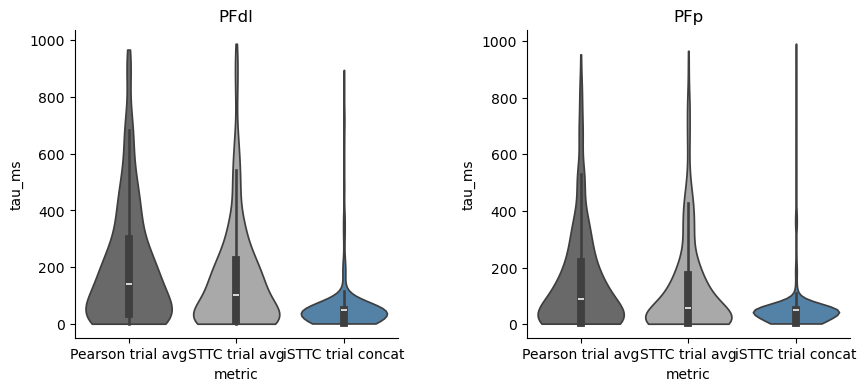

In [9]:
save_fig = True

fig, axes = plt.subplots(1,2, figsize=(10,4))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x='metric', y='tau_ms', data=pfdl_tau_df_long
                .query('tau_ms > 0 and tau_ms < 1000'), cut=0, density_norm='width', 
               order=['Pearson trial avg', 'STTC trial avg', 'iSTTC trial concat'],
               palette=['dimgray', 'darkgrey','steelblue'])
# sns.swarmplot(ax=axes[0], x='metric', y='tau_ms', 
#                   data=pfdl_tau_df_long.query('tau_ms > 0 and tau_ms < 1000'), 
#                   order=['Pearson trial avg', 'STTC trial avg', 'iSTTC trial concat'], color='white', s=2)
axes[0].set_title('PFdl')

sns.violinplot(ax=axes[1], x='metric', y='tau_ms', data=pfp_tau_df_long
                .query('tau_ms > 0 and tau_ms < 1000'), cut=0, density_norm='width', 
               order=['Pearson trial avg', 'STTC trial avg', 'iSTTC trial concat'],
               palette=['dimgray', 'darkgrey','steelblue'])
axes[1].set_title('PFp')

if save_fig:
    fig.savefig(fig_folder + 'p_vs_sttc_trial_vs_sttc_concat_avg_0_1000_20_50ms.png' , bbox_inches='tight')
    fig.savefig(fig_folder + 'p_vs_sttc_trial_vs_sttc_concat_avg_0_1000_20_50ms.svg' , bbox_inches='tight')

for ax in axes.flat:
    sns.despine(ax=ax)